# 50 Year vs 15 Year Module

Comparison case using the functions in CE-MFC to compare 15 year module reliability vs 50 year module reliability.

In [37]:
import CEMFC
import pandas as pd
import matplotlib.pyplot as plt

In [38]:
import os
from pathlib import Path

baselinefolder = Path().resolve().parent.parent / 'CEMFC' / 'baselines'

# Another option using relative address; for some operative systems you might need '/' instead of '\'
# testfolder = os.path.abspath(r'..\..\bifacial_radiance\TEMP')  

print ("Your simulation will be stored in %s" % baselinefolder)

df = pd.read_excel(os.path.join(baselinefolder,'baseline_US_glass.xlsx'), index_col='Year')
df2 = df.copy()

Your simulation will be stored in C:\Users\blond\Documents\GitHub\CircularEconomy-MassFlowCalculator\CEMFC\baselines


In [39]:
plt.rcParams.update({'font.size': 22})
plt.rcParams['figure.figsize'] = (12, 5)

In [40]:
df = CEMFC.calculateMassFlow(df)
df['Reliability_t50_[years]'] = 50
df['Reliability_t90_[years]'] = 60

c:\users\blond\documents\github\circulareconomy-massflowcalculator\CEMFC\main.py:123: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['EoL_Waste_Glass'][df.index[0]] )
c:\users\blond\documents\github\circulareconomy-massflowcalculator\CEMFC\main.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['EoL_Waste_Glass'][year] )


In [56]:
#checking weibull shape parameter values
test_t50 = 50
test_t90 = 60
test = CEMFC.main.weibull_params({test_t50: 0.50, test_t90: 0.90})
print("WEIBULL Parameters for a t50 and t90 of ", test_t50, " & ", test_t90, " years are Alpha: ", test['alpha'], " Beta: ", test['beta'])


WEIBULL Parameters for a t50 and t90 of  50  &  60  years are Alpha:  6.584769167950792  Beta:  52.86194556216414


In [41]:
# df2 = main.sens_lifetime(df2, 19.5, 2025)
df2['Reliability_t50_[years]'] = 8
df2['Reliability_t90_[years]'] = 15
df2 = CEMFC.calculateMassFlow(df2)

In [55]:
#checking weibull shape parameter values
test_t50 = 8
test_t90 = 15
test = CEMFC.main.weibull_params({test_t50: 0.50, test_t90: 0.90})
print("WEIBULL Parameters for a t50 and t90 of ", test_t50, " & ", test_t90, " years are Alpha: ", test['alpha'], " Beta: ", test['beta'])


WEIBULL Parameters for a t50 and t90 of  8  &  15  years are Alpha:  1.9098454146858175  Beta:  9.692463793943663


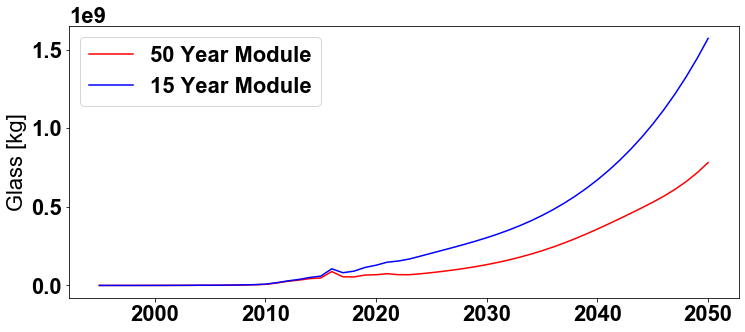

In [43]:
plt.plot(df['Total_Landfilled_Waste'],'r', label='50 Year Module')
plt.plot(df2['Total_Landfilled_Waste'],'b', label='15 Year Module')
plt.ylabel("Glass [kg]")
plt.legend()
#plt.title('Total Landfilled Waste with baseline assumptions ')

Text(0, 0.5, 'Installed Capacity [MW]')

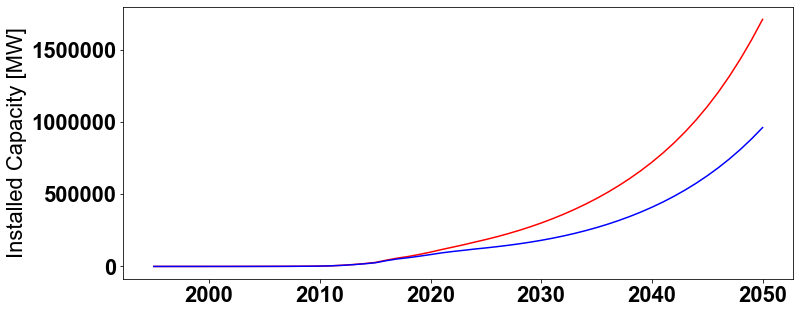

In [60]:
plt.plot(df['installedCapacity_MW_glass'],'r', label='50 Year Module')
plt.plot(df2['installedCapacity_MW_glass'],'b', label='15 Year Module')
plt.ylabel("Installed Capacity [MW]")
#plt.legend()

In [14]:
df3 = df2.copy()

In [15]:
# Modifing the installed capacity requiremetns according to t50. 
# Needs to run each year becuase it needs to calculate the acumulated installs and deads.

for i in range (1995, 2050):
    Under_Installment = (df['installedCapacity_MW_glass'][i] - df3['installedCapacity_MW_glass'][i])
    df3['New_Installed_Capacity_[MW]'][i] = df3['New_Installed_Capacity_[MW]'][i] + Under_Installment
    df3 = CEMFC.calculateMassFlow(df3)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [17]:
# Not pretty, but I wanted to plot what's the instaleld capacity if there are NO DEATHS. ZERO. NIL.
df4 = df2.copy()
df4['installedCapacity_MW_glass'] = [9,
18.7,
30.4,
42.3,
59.5,
81,
110,
154.4,
217.4,
318.2,
421.2,
566.2,
772.7,
1110.7,
1583.8,
2432.8,
4353.8,
7726.8,
12492.8,
18736.8,
26237.8,
41389.8,
52234.8,
63024.8,
76376.63,
91280.42,
107735.98,
122963.21,
138187.23,
154821.66,
172936.5543,
192663.6741,
214146.5077,
237541.3134,
263018.2568,
290762.6482,
320976.2904,
353878.9468,
389709.9396,
428729.8907,
471222.6175,
517497.197,
567890.2141,
622768.2096,
682530.3468,
747611.3142,
818484.4877,
895665.3737,
979715.3585,
1071245.792,
1170922.434,
1279470.297,
1397678.92,
1526408.11,
1666594.199,
1819256.849,
]

In [ ]:
plt.plot(df['installedCapacity_MW_glass'],'r', label='50 Year Module')
#plt.plot(df2['installedCapacity_MW_glass'],'b', label='15 Year Module')
#plt.plot(df3['installedCapacity_MW_glass'],'b*', label='15 Year Module, with extra installations')
plt.plot()
plt.ylim([0, 1.7e6])
plt.ylabel("Installed Capacity [MW]")
plt.legend()

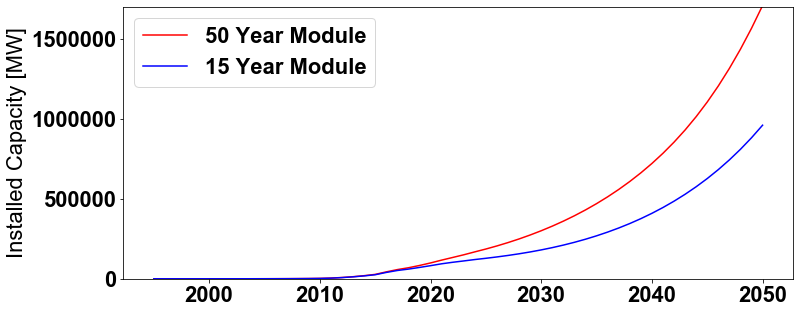

In [32]:
plt.plot(df['installedCapacity_MW_glass'],'r', label='50 Year Module')
plt.plot(df2['installedCapacity_MW_glass'],'b', label='15 Year Module')
#plt.plot(df3['installedCapacity_MW_glass'],'b*', label='15 Year Module, with extra installations')
plt.plot()
plt.ylim([0, 1.7e6])
plt.ylabel("Installed Capacity [MW]")
plt.legend()

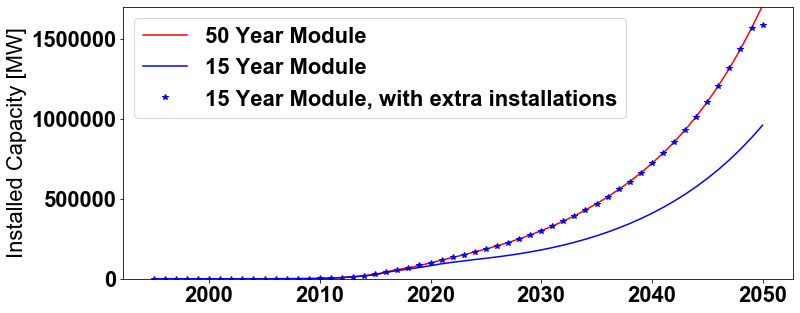

In [29]:
plt.plot(df['installedCapacity_MW_glass'],'r', label='50 Year Module')
plt.plot(df2['installedCapacity_MW_glass'],'b', label='15 Year Module')
plt.plot(df3['installedCapacity_MW_glass'],'b*', label='15 Year Module, with extra installations')
plt.plot()
plt.ylim([0, 1.7e6])
plt.ylabel("Installed Capacity [MW]")
plt.legend()

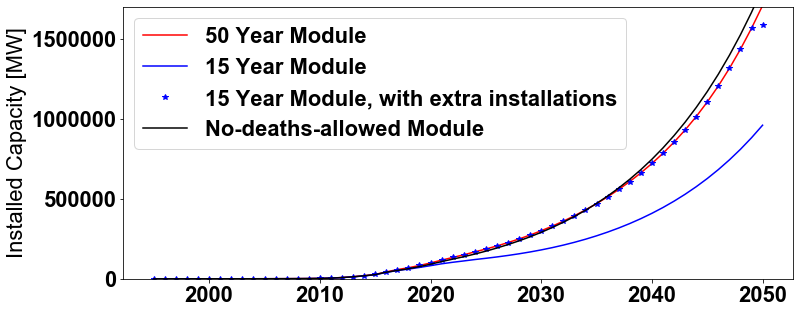

In [30]:
plt.plot(df['installedCapacity_MW_glass'],'r', label='50 Year Module')
plt.plot(df2['installedCapacity_MW_glass'],'b', label='15 Year Module')
plt.plot(df3['installedCapacity_MW_glass'],'b*', label='15 Year Module, with extra installations')
plt.plot(df4['installedCapacity_MW_glass'],'k', label='No-deaths-allowed Module')
plt.plot()
plt.ylim([0, 1.7e6])
plt.ylabel("Installed Capacity [MW]")
plt.legend()

### Back to plotting landfilled mass for the various scenarios

In [61]:
import numpy as np

In [58]:
# Setting the last value to 0 because it has a dip since there is no 
# difference with installments next year becuase it's all 0.
df3['Total_Landfilled_Waste'][2050] = np.nan

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


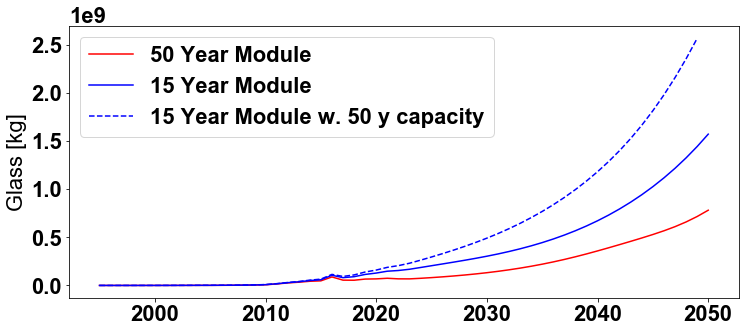

In [59]:
plt.plot(df['Total_Landfilled_Waste'],'r', label='50 Year Module')
plt.plot(df2['Total_Landfilled_Waste'],'b', label='15 Year Module')
plt.plot(df3['Total_Landfilled_Waste'],'b--', label='15 Year Module w. 50 y capacity')

plt.ylabel("Glass [kg]")
plt.legend()
#plt.title('Total Landfilled Waste with baseline assumptions for ')